# Introduction

# Literature Review

# Exploratory analysis

## Mathematical Models

The action of the network depends on several factor: (Michael B. Elowitz , Stanislas Leibler, 2000)
+ trancription rate on repressor concentration
+ tranlation rate
+ decay rates of protein and mRNA

In our model, the rate of change depends on three parts:
+ constant production: $\alpha_i$
+ natural degradation with rate: $\beta_i$
+ interaction between three genes: hill function $h(X_i)=\frac{K_i\theta_i^n}{\theta_i^n+X_i^n}$

rate of change = production - degradation + interactions

Following the paper 'Dynamics in Genetic Networks', Roderick Edwards, Leon Glass (2015)

$$\dot{X}_1  = \alpha_1^0-\beta_1X_1+\frac{K_1\theta_3^n}{\theta_3^n+X_3^n}$$
$$\dot{X}_2  = \alpha_2^0-\beta_2X_2+\frac{K_2\theta_1^n}{\theta_1^n+X_1^n}$$
$$\dot{X}_3  = \alpha_3^0-\beta_3X_3+\frac{K_3\theta_2^n}{\theta_2^n+X_2^n}$$

## Nondimensionlization

\begin{align}
\frac{dm_i}{dt}=\alpha_0-_i+\frac{\alpha_1}{1+p_{j_i}^n}, j_1=3, j_2 =1, j_3=2
\end{align}

$$\frac{dp_i}{dt}=-\beta(p_i-m_i)$$

Considering 3 genes networks

$$m_1(0)=1,5, m_2(0)=1.0, m_3(0)=1.3$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1.5,1.0,1.3,p1_0,p2_0,p3_0)
    t = np.linspace(0,30,3000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,p1,'b',label='p1')
    plt.plot(t,p2,'g',label='p2')
    plt.plot(t,p3,'k',label='p3')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.title('Exploratory analysis about the numerical solutions')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,p1_0=(0,30,0.01),p2_0=(0,30,0.01),p3_0=(0,30,0.01),n=(1,10,0.1),alpha_0=(0,10,0.1),alpha_1=(0.1,100,0.1),beta=(0,10,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='p1_0', max=30.0, step=0.01), FloatSlider(value=15.0…

Generalized model

$$\frac{dx_i}{dt}=-x_i+\frac{\theta^n}{\theta^n+x_{i-1}^n}$$

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p2**n),alpha_0-m3+alpha_1/(1+p1**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1,1,1,p1_0,p2_0,p3_0)
    t = np.linspace(0,10,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,m1,'b',label='p1')
    plt.plot(t,m2,'g',label='p2')
    plt.plot(t,m3,'k',label='p3')
    plt.xlabel('t')
    plt.ylabel('p1,p2,p3')
    plt.title('Exploratory analysis about the numerical solutions')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,p1_0=(0,30,0.01),p2_0=(0,30,0.01),p3_0=(0,30,0.01),n=(1,10,0.1),alpha_0=(0,10,0.1),alpha_1=(0.1,1000,0.1),beta=(0,10,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='p1_0', max=30.0, step=0.01), FloatSlider(value=15.0…

In [27]:
t = np.linspace(0,10,1000)

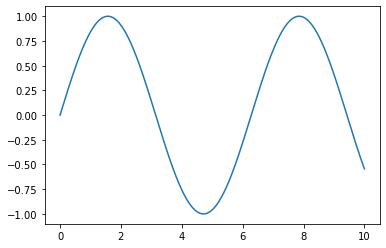

In [33]:
plt.plot(t,np.sin(t))